In [1]:
####################################################################################################################
# Competition   : Dry Beans Classification
# Team Members  : 1- Abdullah Abdelhakeem
#                 2- Mohamed Sebaie                   
#                 3- Mohamed Moustafa
#                 4- Ossama Ahmed
#                 5- Mahmoud Osama
#                 6- Hazem
#
# Problem :       Supervised Classification
# version :       0.0.1
#
###################################################################################################################

# Dataset Information



Given a set of features extracted from the shape of the beans in images and  it's required to predict the class of a bean given some features about its shape.
There are 7 bean types in this dataset.

**Data fields**
- ID - an ID for this instance
- Area - (A), The area of a bean zone and the number of pixels within its boundaries.
- Perimeter - (P), Bean circumference is defined as the length of its border.
- MajorAxisLength - (L), The distance between the ends of the longest line that can be drawn from a bean.
- MinorAxisLength - (l), The longest line that can be drawn from the bean while standing perpendicular to the main axis.
- AspectRatio - (K), Defines the relationship between L and l.
- Eccentricity - (Ec), Eccentricity of the ellipse having the same moments as the region.
- ConvexArea - (C), Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
- EquivDiameter - (Ed), The diameter of a circle having the same area as a bean seed area.
- Extent - (Ex), The ratio of the pixels in the bounding box to the bean area.
- Solidity - (S), Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
- Roundness - (R), Calculated with the following formula: (4piA)/(P^2)
- Compactness - (CO), Measures the roundness of an object: Ed/L
- ShapeFactor1 - (SF1)
- ShapeFactor2 - (SF2)
- ShapeFactor3 - (SF3)
- ShapeFactor4 - (SF4)
- y - the class of the bean. It can be any of BARBUNYA, SIRA, HOROZ, DERMASON, CALI, BOMBAY, and SEKER.


<img src= "https://www.thespruceeats.com/thmb/eeIti36pfkoNBaipXrTHLjIv5YA=/1888x1416/smart/filters:no_upscale()/DriedBeans-56f6c2c43df78c78418c3b46.jpg" alt ="Titanic" style='width: 800px;height:400px'>

# Import Required Libraries

In [2]:
# !pip install catboost

In [3]:
# pip install mlxtend

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
#####################################################################
# for visualizations
from pandas import plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)
###########################################################
%config Completer.use_jedi=False
pd.set_option("display.max_columns", None)

# ignore the warnings
import warnings
warnings.filterwarnings("ignore")
np.set_printoptions(suppress=True)

# for path
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Read Train and Test Data

In [5]:
# dataset_path = '/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/'
# dfTrainO = pd.read_csv(os.path.join(dataset_path, 'train.csv'))
# dfTestO = pd.read_csv(os.path.join(dataset_path, 'test.csv'))
# print("The shape of the dataset is {}.\n\n".format(dfTrainO.shape))
# print("The shape of the dataset is {}.\n\n".format(dfTestO.shape))
# dfTrainO.head()

In [6]:
dfTrainO=pd.read_csv("train.csv")
print('---'*30)
print('Train Head')
print('---'*30)
display(dfTrainO.head())
dfTestO=pd.read_csv("test.csv")
print('---'*30)
print('Test Head')
print('---'*30)
display(dfTestO.head())

------------------------------------------------------------------------------------------
Train Head
------------------------------------------------------------------------------------------


,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


------------------------------------------------------------------------------------------
Test Head
------------------------------------------------------------------------------------------


,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803


__________________________________________________

In [7]:
print(dfTrainO.shape)

print(dfTestO.shape)

(10834, 18)
(2709, 17)


In [8]:
print(dfTrainO.info())
print("***"*20)
print(dfTestO.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

In [9]:
dfTrainO.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10834.0,5416.500000,3127.650742,0.000000,2708.250000,5416.500000,8124.750000,10833.000000
Area,10834.0,53095.675189,29542.542580,20420.000000,36343.500000,44645.000000,61295.000000,254616.000000
Perimeter,10834.0,855.274892,214.991122,524.932000,703.601250,793.739500,975.517500,1985.370000
MajorAxisLength,10834.0,320.036169,85.961630,183.601165,253.501071,296.377365,376.068399,738.860153
MinorAxisLength,10834.0,202.410342,45.113965,129.576207,175.927024,192.525040,217.315195,450.926187
AspectRation,10834.0,1.581294,0.244314,1.024868,1.432985,1.550761,1.703029,2.388873
Eccentricity,10834.0,0.750588,0.091481,0.218951,0.716250,0.764314,0.809450,0.908167
ConvexArea,10834.0,53816.205926,29999.710739,20684.000000,36731.250000,45148.000000,62251.500000,263261.000000
EquivDiameter,10834.0,253.123583,59.433080,161.243764,215.113880,238.419335,279.362162,569.374358
Extent,10834.0,0.749937,0.048949,0.555315,0.718778,0.760141,0.786871,0.866195


**Features like:** (Eccentricity , Extent ,Solidity ,roundness ,Compactness ,and shapeFactor3,4 ) **ranges between (0 and 1)**

**Features Like:** (shapeFactor1,2) **Ranges in 0.001**

**On the other side , there are other features like:**
- (Area) ranges between (20420 and 254616 )
- (ConvexArea) ranges between (20684 and 263261 )
- (Perimeter) ranges between (524 and 1986)
- (MajorAxisLength) ranges between (183 and 738)
- (MinorAxisLength) ranges between (129 and 451)
- (EquivDiameter) ranges between (161 and 570)
- (AspectRation) ranges between (1 and 2.4)


When a dataset has values of different columns at different scales, it gets tough to analyze the trends and patterns , so we need to make sure that all the columns have a significant difference in their scales, and they can be modified in such a way that all those values fall into the same scale. This process is called Scaling.

In [10]:
dfTestO.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2709.0,12188.000000,782.165264,10834.000000,11511.000000,12188.000000,12865.000000,13542.000000
Area,2709.0,52859.636028,28788.904724,20548.000000,36144.000000,44397.000000,61626.000000,231066.000000
Perimeter,2709.0,853.867669,213.681592,524.736000,700.485000,794.894000,979.260000,1845.855000
MajorAxisLength,2709.0,319.333439,85.210636,183.965251,251.623237,297.858034,376.701298,713.967282
MinorAxisLength,2709.0,202.185268,44.809321,122.512653,175.374226,192.367881,216.233028,460.198497
AspectRation,2709.0,1.580199,0.248980,1.036423,1.425448,1.548174,1.706945,2.430306
Eccentricity,2709.0,0.749225,0.093357,0.262774,0.712636,0.763403,0.810425,0.911423
ConvexArea,2709.0,53575.145441,29218.902099,20825.000000,36504.000000,45003.000000,62568.000000,232903.000000
EquivDiameter,2709.0,252.676206,58.813187,161.748342,214.522656,237.756211,280.115441,542.404248
Extent,2709.0,0.749399,0.048909,0.574040,0.718512,0.758598,0.786651,0.842382


In [11]:
dfTrainO.describe(include=object)

,y
count,10834
unique,7
top,DERMASON
freq,2837


In [12]:
dfTrainO['y'].value_counts()

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

# Data Visualization
**Heatmap**

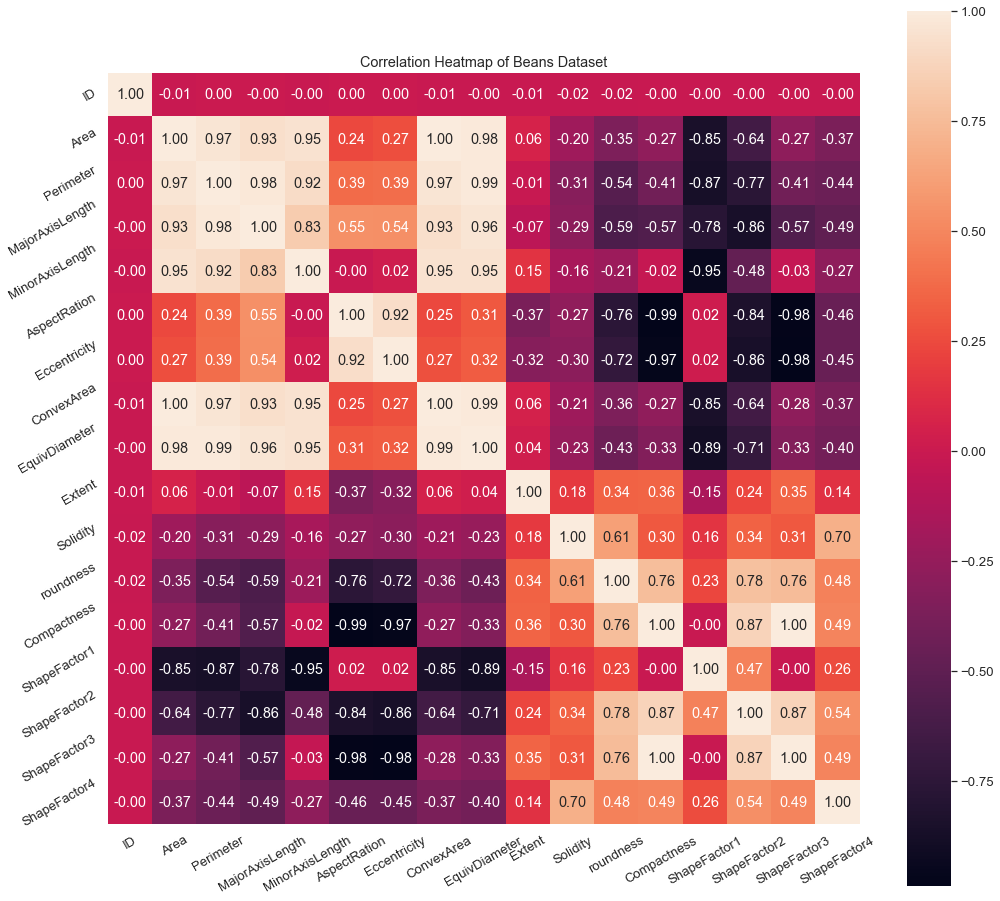

In [13]:
corr_matrix = dfTrainO.corr()

plt.figure(figsize=(15,15))
plt.title('Correlation Heatmap of Beans Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

In [14]:
abs(dfTrainO.drop(columns="ID").corr())

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966881,0.933198,0.952536,0.243893,0.268565,0.999940,0.984987,0.061387,0.200078,0.354127,0.270134,0.848371,0.640619,0.274081,0.365265
Perimeter,0.966881,1.000000,0.977830,0.915162,0.386119,0.390878,0.967823,0.991439,0.013889,0.307817,0.543906,0.407622,0.866250,0.768104,0.409079,0.439272
MajorAxisLength,0.933198,0.977830,1.000000,0.830452,0.548912,0.539787,0.933934,0.962754,0.070935,0.285916,0.589910,0.566905,0.777222,0.858387,0.566625,0.491591
MinorAxisLength,0.952536,0.915162,0.830452,1.000000,0.003095,0.024388,0.952268,0.949832,0.152157,0.160567,0.211275,0.021042,0.947040,0.476659,0.025152,0.273554
AspectRation,0.243893,0.386119,0.548912,0.003095,1.000000,0.924040,0.245408,0.305557,0.372383,0.266038,0.762150,0.987664,0.019197,0.837526,0.978550,0.456479
Eccentricity,0.268565,0.390878,0.539787,0.024388,0.924040,1.000000,0.270283,0.319497,0.319550,0.295614,0.716765,0.970173,0.015644,0.859207,0.980946,0.453895
ConvexArea,0.999940,0.967823,0.933934,0.952268,0.245408,0.270283,1.000000,0.985223,0.059711,0.209552,0.358655,0.271930,0.848345,0.642119,0.275901,0.371420
EquivDiameter,0.984987,0.991439,0.962754,0.949832,0.305557,0.319497,0.985223,1.000000,0.035291,0.234767,0.432327,0.329457,0.893598,0.714397,0.332067,0.402038
Extent,0.061387,0.013889,0.070935,0.152157,0.372383,0.319550,0.059711,0.035291,1.000000,0.180843,0.341669,0.355279,0.147888,0.235020,0.348442,0.142275
Solidity,0.200078,0.307817,0.285916,0.160567,0.266038,0.295614,0.209552,0.234767,0.180843,1.000000,0.614744,0.301718,0.158452,0.343114,0.305648,0.695040


From this correlation matrix we can exctract features that are strongly correlated like : 
- Area
- Perimeter
- MajorAxisLength
- MinorAxisLength
- ConvexArea
- EquivDiameter
- ShapeFactor1

Features to be drobbed : 

- ShapeFactor3
- Compactness
- AspectRation
- Area
- MajorAxisLength
- MinorAxisLength
- ConvexArea
- EquivDiameter
- ShapeFactor1

In [15]:
# Strongly_corr_features = dfTrainO.drop(columns="ID")
# Strongly_corr_features.head()
# sns.set_theme(style="whitegrid")
# sns.pairplot(Strongly_corr_features, hue="y")

**From the graph above, Linear and log relations can be detected.**

**Next step will be Detecting how Beans classes can be effected by many features ..**

<AxesSubplot:xlabel='y', ylabel='MajorAxisLength'>

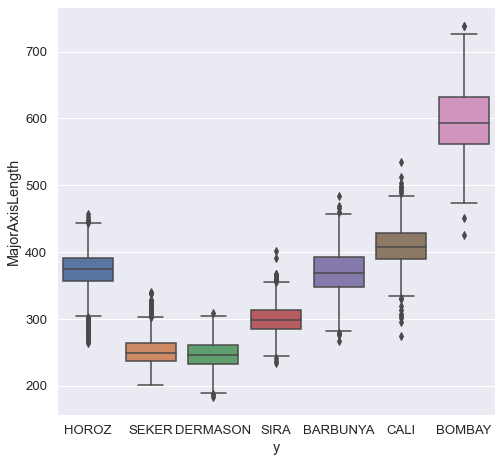

In [16]:
sns.boxplot(x="y", y="MajorAxisLength", data=dfTrainO)

<AxesSubplot:xlabel='y', ylabel='Perimeter'>

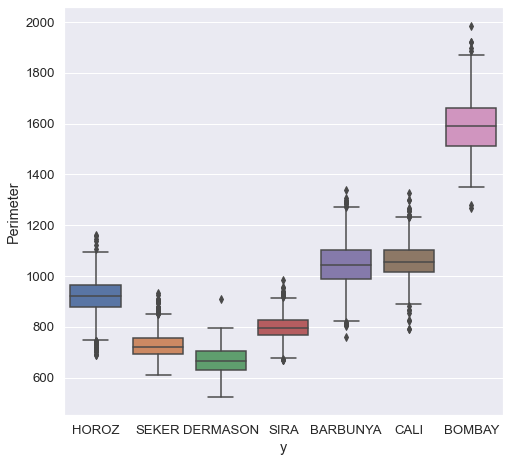

In [17]:
sns.boxplot(x="y", y="Perimeter", data=dfTrainO)

- A perimeter is  a path that encompasses/surrounds/outlines a shape or its length. 'Wikipedia'
- The above graph shows that (BOMBAY) has the highest perimeter

In [18]:
dfTrainNEW=dfTrainO.copy()

In [19]:
dfTrainNEW.columns

Index(['ID', 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'y'],
      dtype='object')

In [20]:
dfTestNEW=dfTestO.copy()

# Value Counts and Uniques Equations

In [21]:
def ValueCounts(df):
    for c in df.columns:
        print(c+"\n"+"-----------------"+"\n")
        print(df[c].value_counts().to_frame())
        print("\n"+"******************"+"\n")
        
def UniqueValues(df,l):
    for c in l:
        print(c+"\n"+"-----------------"+"\n")
        print(df[c].nunique())
        print("\n"+"******************"+"\n")

In [22]:
ValueCounts(dfTrainNEW)

ID
-----------------

      ID
0      1
8801   1
597    1
6742   1
4695   1
...   ..
5424   1
7473   1
1330   1
3379   1
2047   1

[10834 rows x 1 columns]

******************

Area
-----------------

       Area
38542     4
30529     4
34594     4
36109     4
33143     3
...     ...
83522     1
43208     1
44615     1
38472     1
34815     1

[9794 rows x 1 columns]

******************

Perimeter
-----------------

          Perimeter
683.341           3
763.489           2
736.459           2
775.619           2
784.924           2
...             ...
776.063           1
1026.183          1
1506.502          1
1136.169          1
842.549           1

[10748 rows x 1 columns]

******************

MajorAxisLength
-----------------

            MajorAxisLength
341.236173                1
375.047391                1
250.152338                1
260.180374                1
250.627135                1
...                     ...
258.653910                1
198.629807                1
259.44

In [23]:
ValueCounts(dfTestNEW)

ID
-----------------

       ID
12288   1
10992   1
10984   1
13033   1
10986   1
...    ..
11441   1
13490   1
11443   1
13492   1
12286   1

[2709 rows x 1 columns]

******************

Area
-----------------

       Area
39528     3
50181     2
38970     2
43435     2
47225     2
...     ...
71016     1
49122     1
77163     1
42348     1
75775     1

[2645 rows x 1 columns]

******************

Perimeter
-----------------

          Perimeter
678.629           2
805.168           2
690.354           2
726.205           2
608.736           2
...             ...
830.354           1
937.725           1
1112.883          1
704.322           1
918.433           1

[2703 rows x 1 columns]

******************

MajorAxisLength
-----------------

            MajorAxisLength
278.637481                1
243.741422                1
339.352567                1
328.262020                1
316.062167                1
...                     ...
247.568481                1
411.397192              

In [24]:
UniqueValues(dfTrainNEW,dfTrainNEW.columns)

ID
-----------------

10834

******************

Area
-----------------

9794

******************

Perimeter
-----------------

10748

******************

MajorAxisLength
-----------------

10834

******************

MinorAxisLength
-----------------

10834

******************

AspectRation
-----------------

10834

******************

Eccentricity
-----------------

10834

******************

ConvexArea
-----------------

9908

******************

EquivDiameter
-----------------

9794

******************

Extent
-----------------

10830

******************

Solidity
-----------------

10824

******************

roundness
-----------------

10834

******************

Compactness
-----------------

10834

******************

ShapeFactor1
-----------------

10834

******************

ShapeFactor2
-----------------

10834

******************

ShapeFactor3
-----------------

10834

******************

ShapeFactor4
-----------------

10834

******************

y
-----------------

7

******

In [25]:
UniqueValues(dfTestNEW,dfTestNEW.columns)

ID
-----------------

2709

******************

Area
-----------------

2645

******************

Perimeter
-----------------

2703

******************

MajorAxisLength
-----------------

2709

******************

MinorAxisLength
-----------------

2709

******************

AspectRation
-----------------

2709

******************

Eccentricity
-----------------

2709

******************

ConvexArea
-----------------

2627

******************

EquivDiameter
-----------------

2645

******************

Extent
-----------------

2709

******************

Solidity
-----------------

2708

******************

roundness
-----------------

2709

******************

Compactness
-----------------

2709

******************

ShapeFactor1
-----------------

2709

******************

ShapeFactor2
-----------------

2709

******************

ShapeFactor3
-----------------

2709

******************

ShapeFactor4
-----------------

2709

******************



In [26]:
dfTrainNEW.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10834.0,5416.500000,3127.650742,0.000000,2708.250000,5416.500000,8124.750000,10833.000000
Area,10834.0,53095.675189,29542.542580,20420.000000,36343.500000,44645.000000,61295.000000,254616.000000
Perimeter,10834.0,855.274892,214.991122,524.932000,703.601250,793.739500,975.517500,1985.370000
MajorAxisLength,10834.0,320.036169,85.961630,183.601165,253.501071,296.377365,376.068399,738.860153
MinorAxisLength,10834.0,202.410342,45.113965,129.576207,175.927024,192.525040,217.315195,450.926187
AspectRation,10834.0,1.581294,0.244314,1.024868,1.432985,1.550761,1.703029,2.388873
Eccentricity,10834.0,0.750588,0.091481,0.218951,0.716250,0.764314,0.809450,0.908167
ConvexArea,10834.0,53816.205926,29999.710739,20684.000000,36731.250000,45148.000000,62251.500000,263261.000000
EquivDiameter,10834.0,253.123583,59.433080,161.243764,215.113880,238.419335,279.362162,569.374358
Extent,10834.0,0.749937,0.048949,0.555315,0.718778,0.760141,0.786871,0.866195


In [27]:
dfTestNEW.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2709.0,12188.000000,782.165264,10834.000000,11511.000000,12188.000000,12865.000000,13542.000000
Area,2709.0,52859.636028,28788.904724,20548.000000,36144.000000,44397.000000,61626.000000,231066.000000
Perimeter,2709.0,853.867669,213.681592,524.736000,700.485000,794.894000,979.260000,1845.855000
MajorAxisLength,2709.0,319.333439,85.210636,183.965251,251.623237,297.858034,376.701298,713.967282
MinorAxisLength,2709.0,202.185268,44.809321,122.512653,175.374226,192.367881,216.233028,460.198497
AspectRation,2709.0,1.580199,0.248980,1.036423,1.425448,1.548174,1.706945,2.430306
Eccentricity,2709.0,0.749225,0.093357,0.262774,0.712636,0.763403,0.810425,0.911423
ConvexArea,2709.0,53575.145441,29218.902099,20825.000000,36504.000000,45003.000000,62568.000000,232903.000000
EquivDiameter,2709.0,252.676206,58.813187,161.748342,214.522656,237.756211,280.115441,542.404248
Extent,2709.0,0.749399,0.048909,0.574040,0.718512,0.758598,0.786651,0.842382


_________________________________________________

_______________________________________________________

# Check for skewness

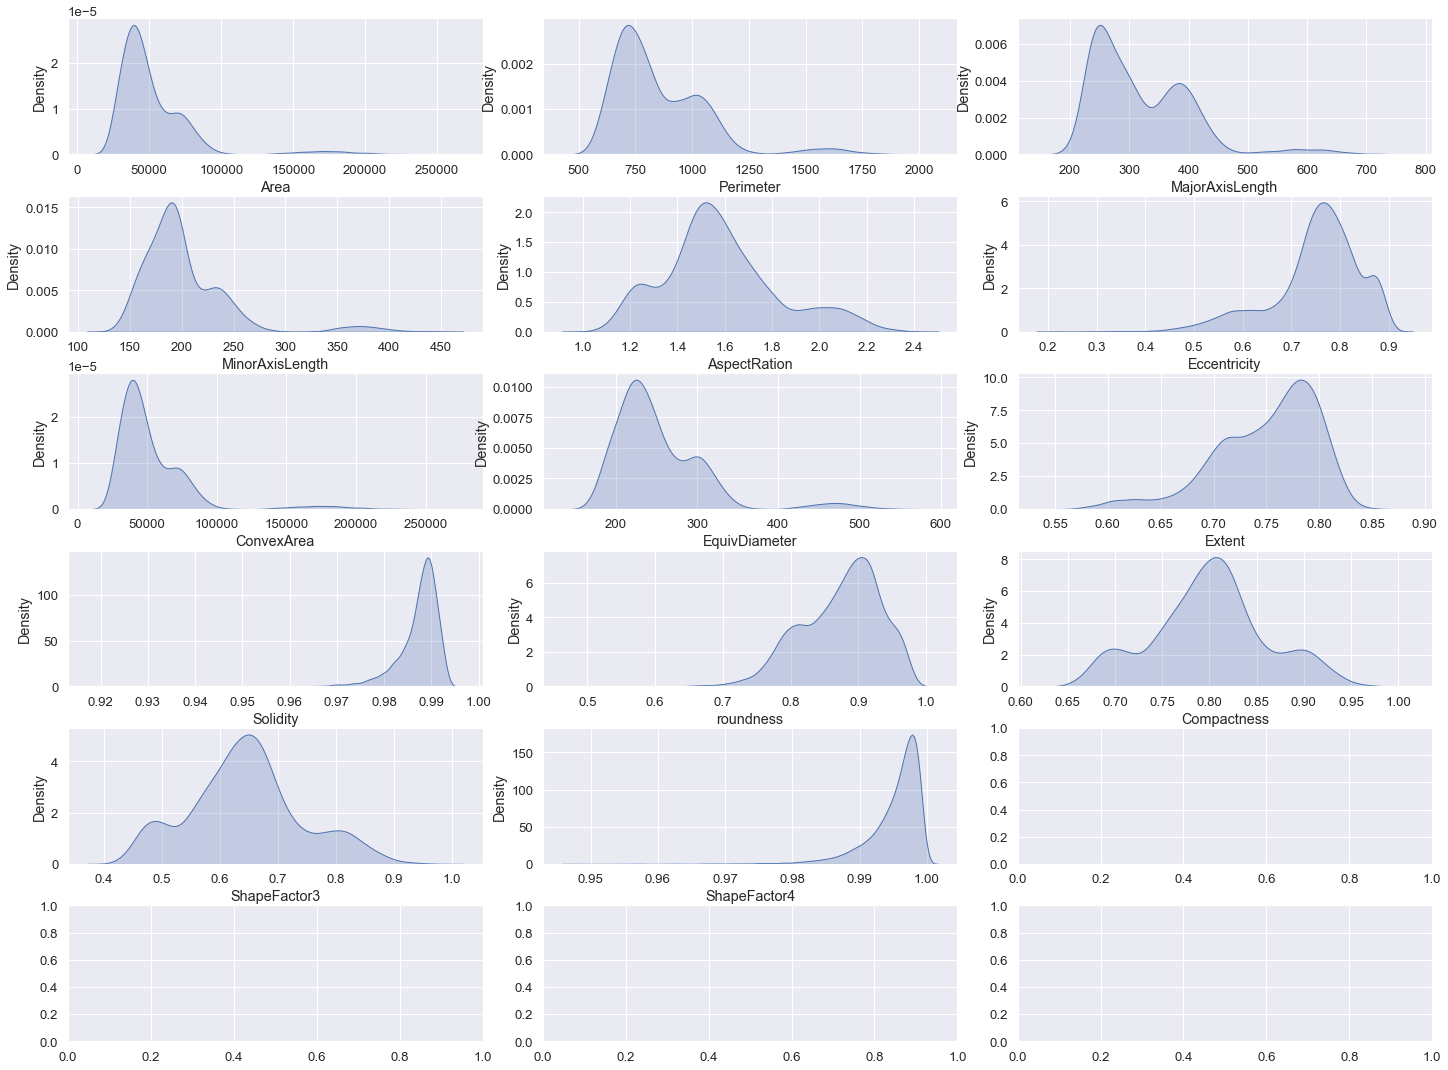

In [28]:
figure, axes = plt.subplots(nrows=6, ncols=3)
figure.set_size_inches(20,15)
figure.tight_layout()
sns.kdeplot(dfTrainNEW['Area']                   ,shade=True, ax=axes[0][0]);
sns.kdeplot(dfTrainNEW['Perimeter']              ,shade=True, ax=axes[0][1]);
sns.kdeplot(dfTrainNEW['MajorAxisLength']        ,shade=True, ax=axes[0][2]);
sns.kdeplot(dfTrainNEW['MinorAxisLength']        ,shade=True, ax=axes[1][0]);
sns.kdeplot(dfTrainNEW['AspectRation']           ,shade=True, ax=axes[1][1]);
sns.kdeplot(dfTrainNEW['Eccentricity']           ,shade=True, ax=axes[1][2]);
sns.kdeplot(dfTrainNEW['ConvexArea']             ,shade=True, ax=axes[2][0]);
sns.kdeplot(dfTrainNEW['EquivDiameter']          ,shade=True, ax=axes[2][1]);
sns.kdeplot(dfTrainNEW['Extent']                 ,shade=True, ax=axes[2][2]);
sns.kdeplot(dfTrainNEW['Solidity']               ,shade=True, ax=axes[3][0]);
sns.kdeplot(dfTrainNEW['roundness']              ,shade=True, ax=axes[3][1]);
sns.kdeplot(dfTrainNEW['Compactness']            ,shade=True, ax=axes[3][2]);
# sns.kdeplot(dfTrainNEW['ShapeFactor1']           ,shade=True, ax=axes[4][0]);
# sns.kdeplot(dfTrainNEW['ShapeFactor2']           ,shade=True, ax=axes[4][1]);
sns.kdeplot(dfTrainNEW['ShapeFactor3']           ,shade=True, ax=axes[4][0]);
sns.kdeplot(dfTrainNEW['ShapeFactor4']           ,shade=True, ax=axes[4][1]);


## Features to Check

In [29]:
def SkewnessCheck(df,feature):
    df=df.copy()
    df['log'+feature]   =df[feature].apply(np.log1p)
    df['sqrt'+feature]  =df[feature].apply(np.sqrt)
    df['squar'+feature] =np.power(df[feature],2)
    figure, axes = plt.subplots(nrows=1, ncols=4)
    figure.set_size_inches(20,10)
    sns.kdeplot(df[feature]          ,shade=True, ax=axes[0]);
    sns.kdeplot(df['log'+feature]    ,shade=True, ax=axes[1]);
    sns.kdeplot(df['sqrt'+feature]   ,shade=True, ax=axes[2]);
    sns.kdeplot(df['squar'+feature]  ,shade=True, ax=axes[3]);

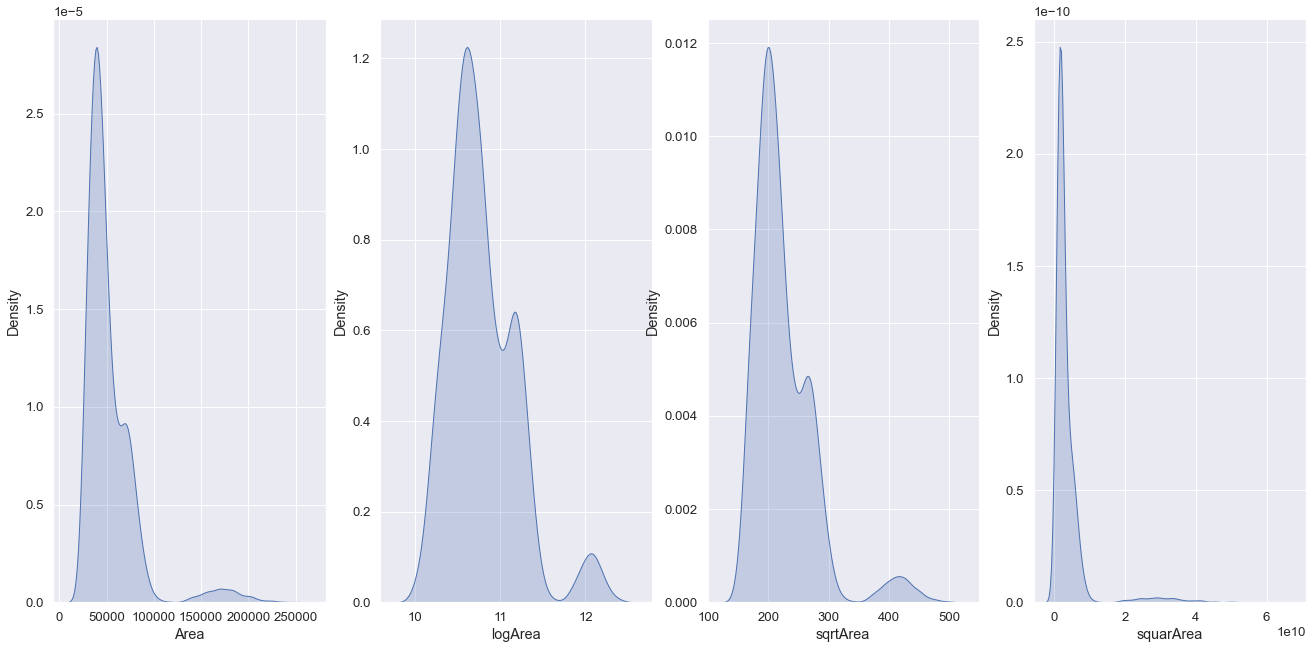

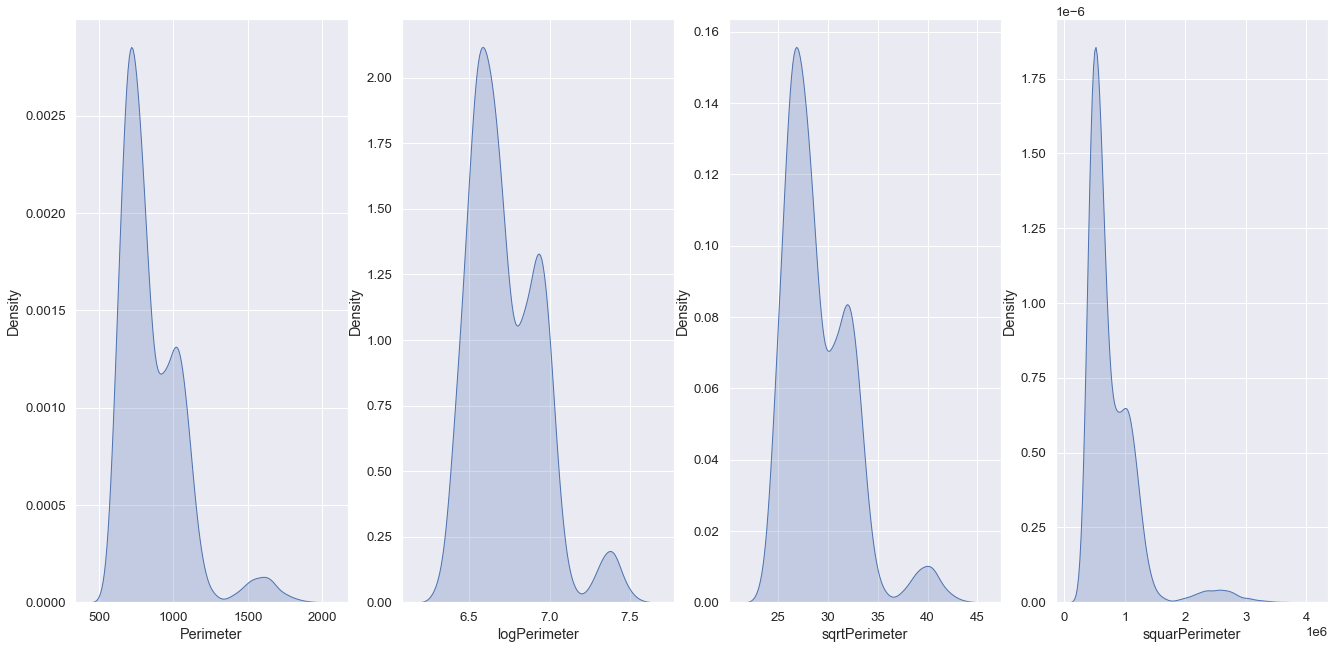

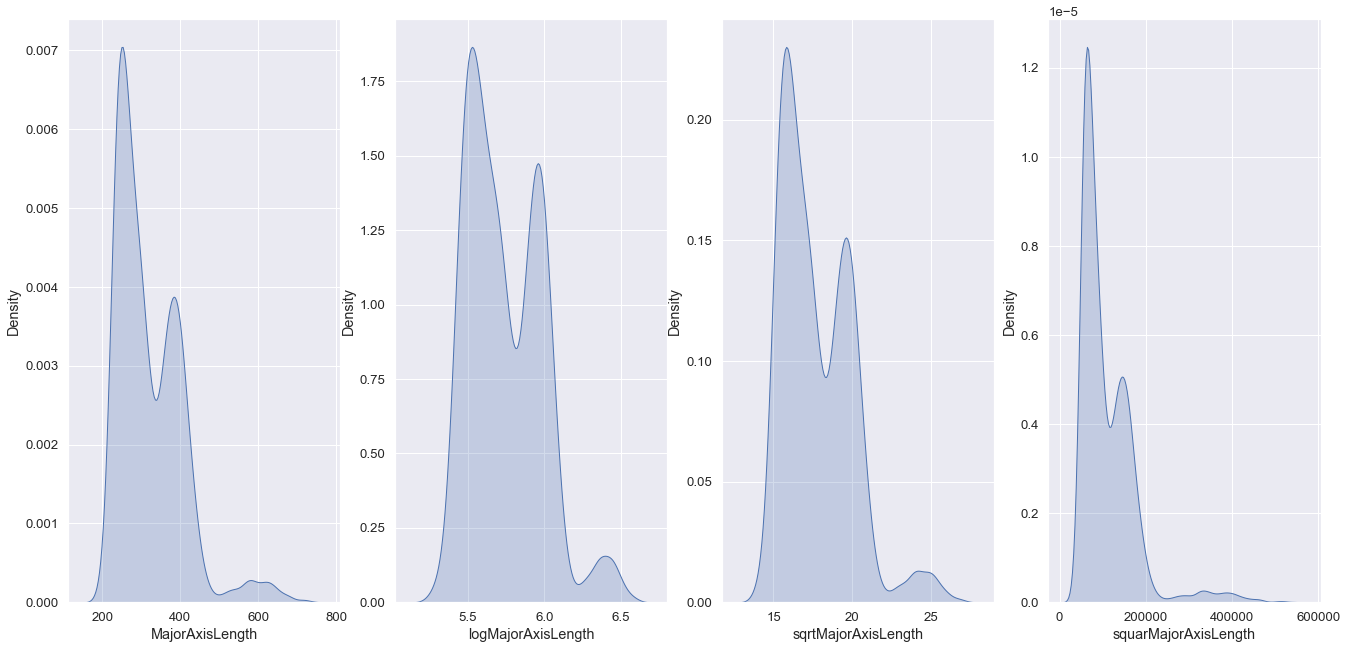

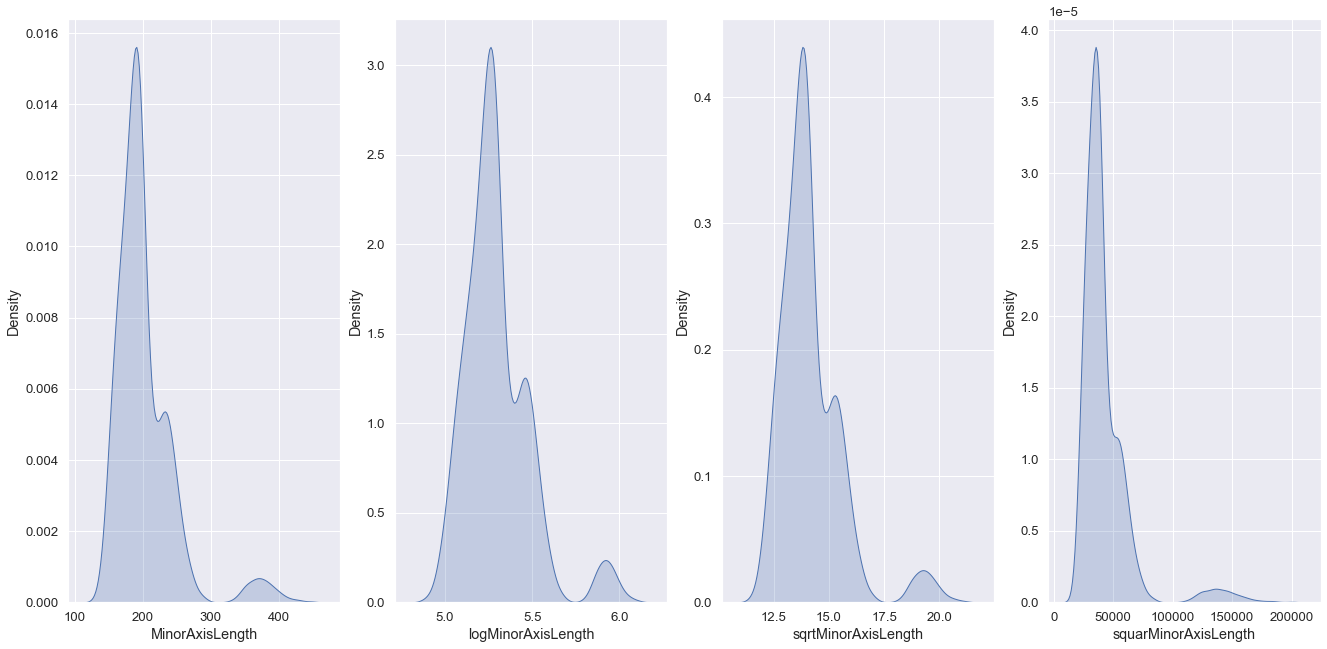

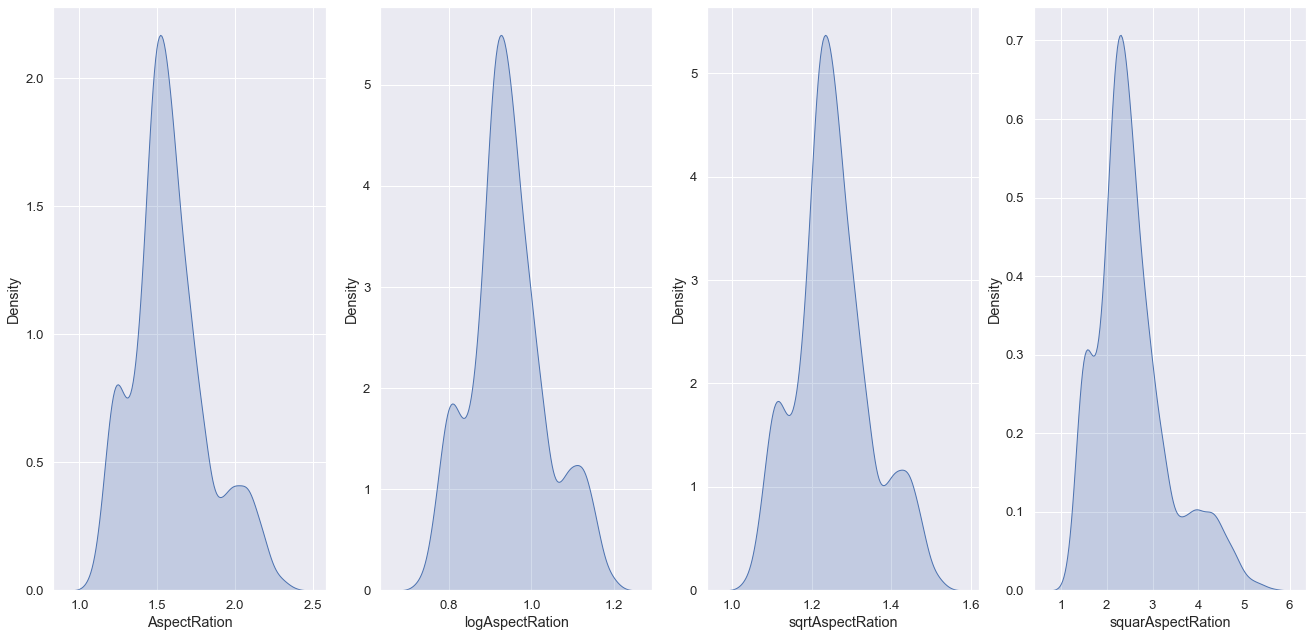

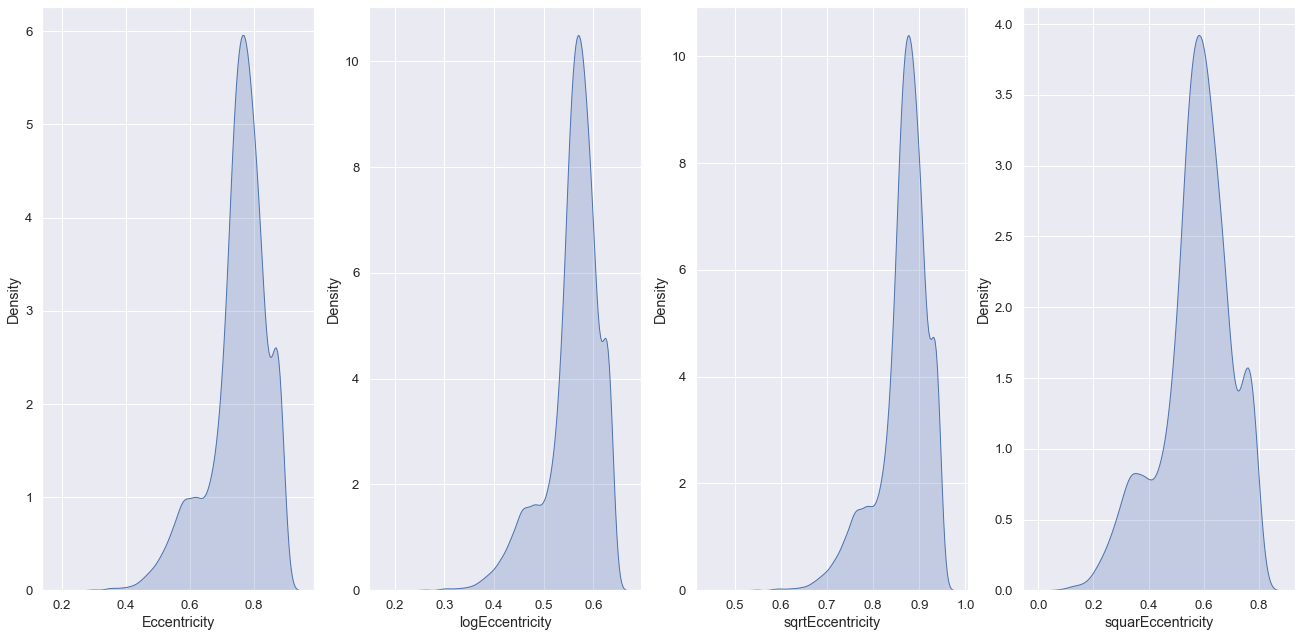

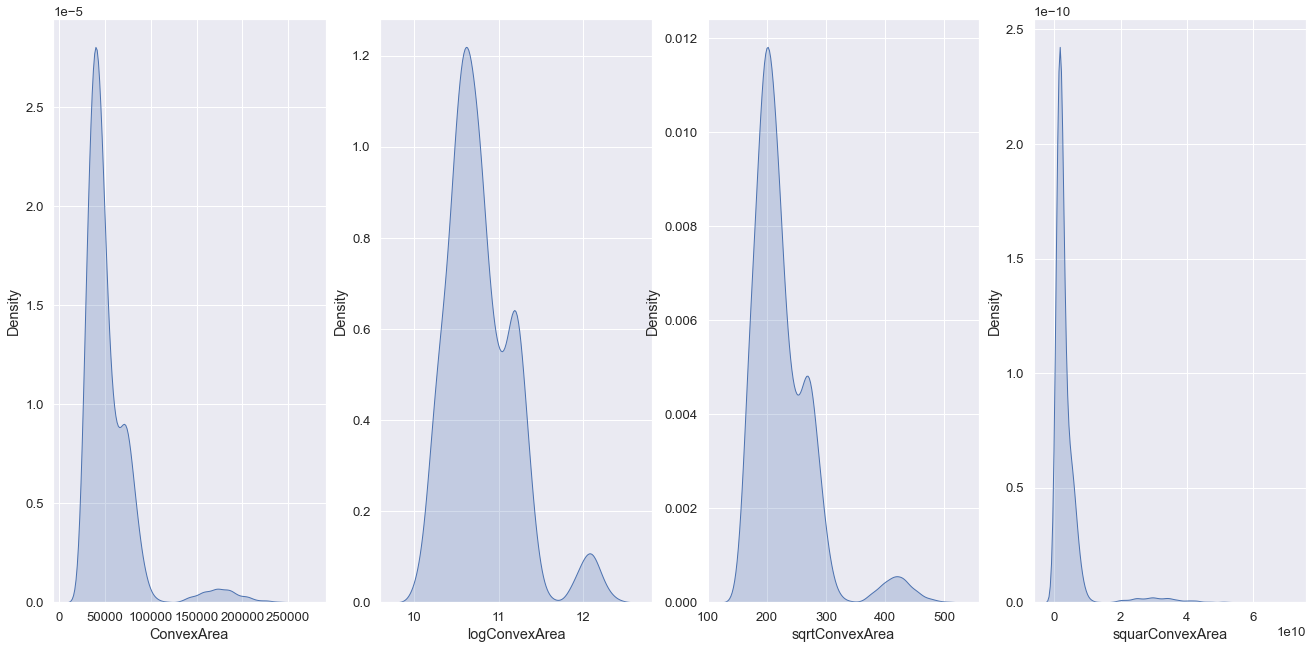

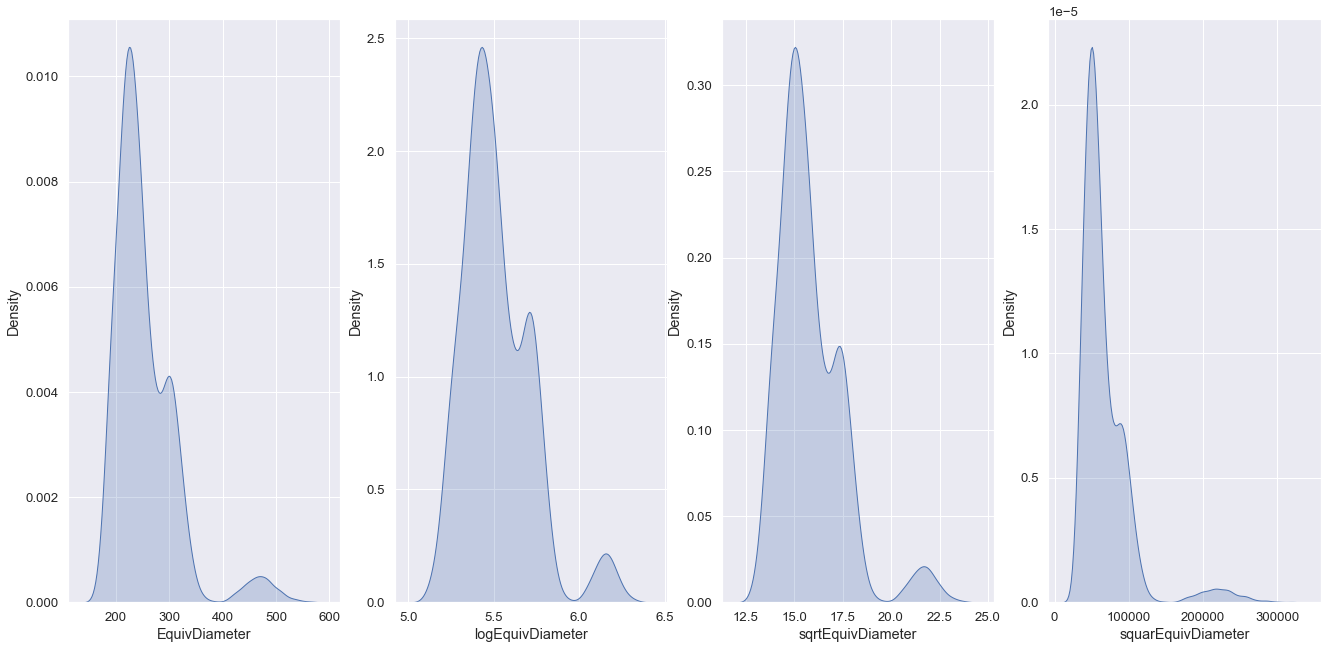

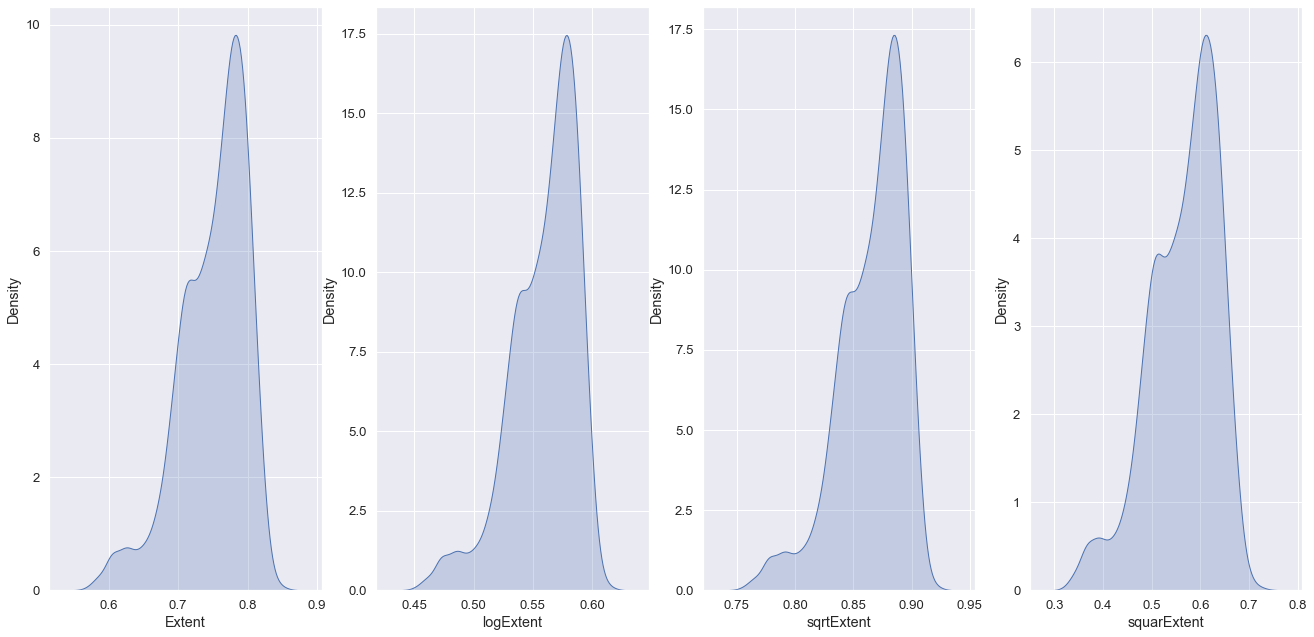

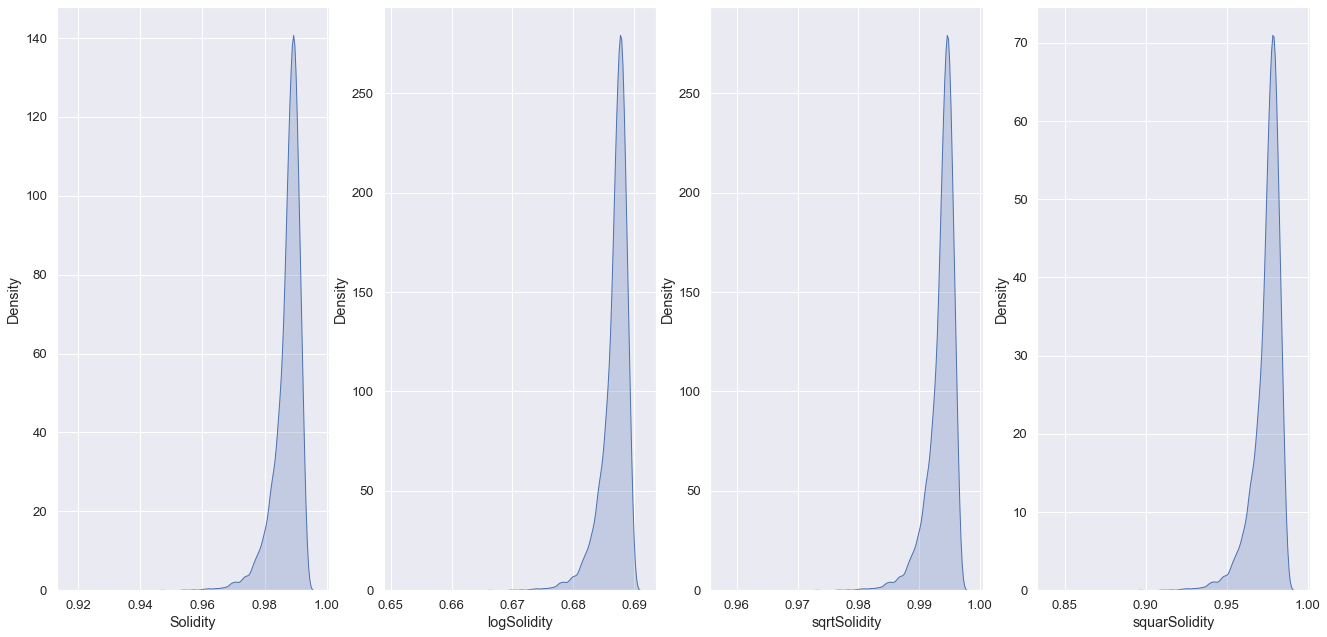

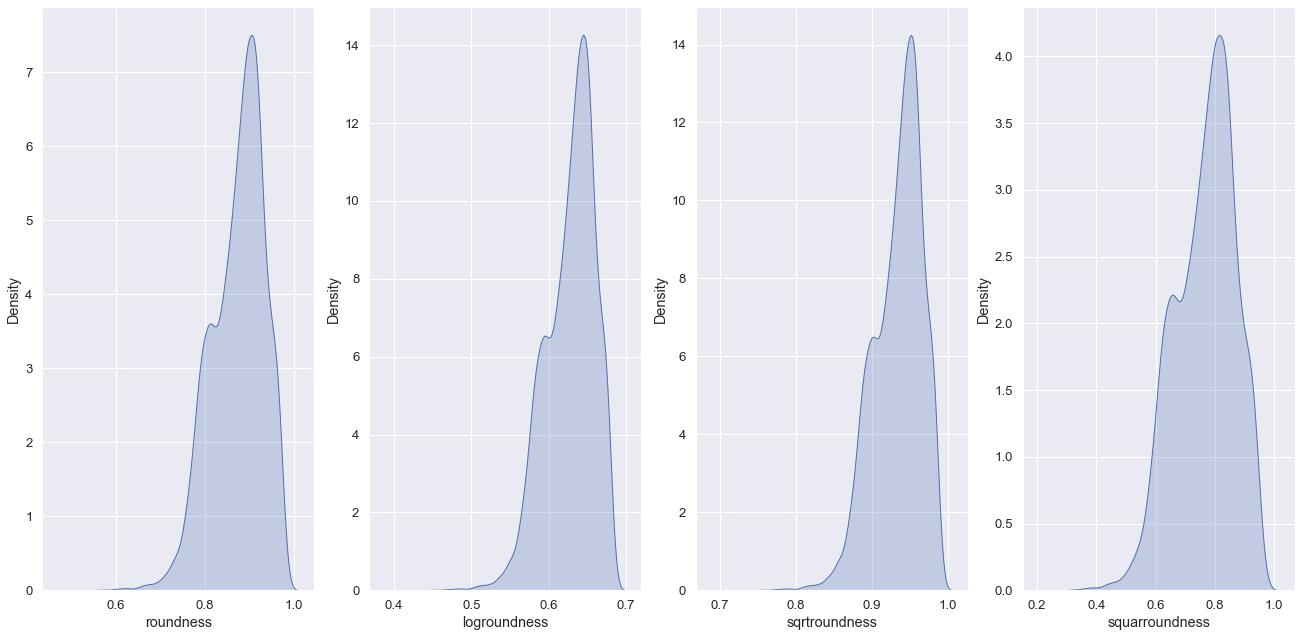

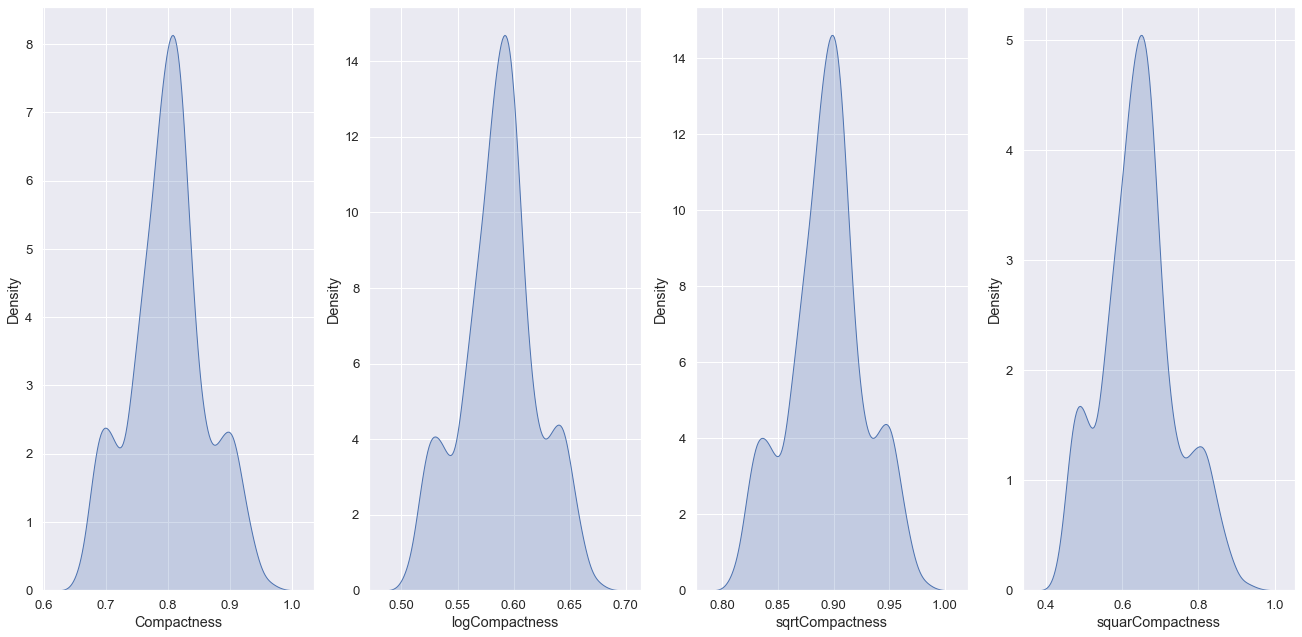

In [30]:
for f in dfTrainNEW.columns.to_list()[1:-5]:
      SkewnessCheck(dfTrainNEW,f)

In [31]:
dfTrainNEW.columns

Index(['ID', 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'y'],
      dtype='object')

### Best Parameters to Use
#### `Log` Area, Premeter, MajoirAxesLength, MinorAxesLength,ConvexArea, EquivDiameter

## Apply To Train and Test Data

In [32]:
def Convert(df,feature):
    df['log'+feature]   =df[feature].apply(np.log1p)
    

In [33]:
featuersToconvert=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'EquivDiameter']

In [34]:
# for f in featuersToconvert:
#       Convert(dfTrainNEW,f)

In [35]:
# for f in featuersToconvert:
#       Convert(dfTestNEW,f)

In [36]:
dfTrainNEW.shape

(10834, 18)

In [37]:
dfTestNEW.shape

(2709, 17)

In [38]:
dfTrainNEW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

In [39]:
dfTestNEW.columns

Index(['ID', 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

In [40]:
dfTestNEW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2709 non-null   int64  
 1   Area             2709 non-null   int64  
 2   Perimeter        2709 non-null   float64
 3   MajorAxisLength  2709 non-null   float64
 4   MinorAxisLength  2709 non-null   float64
 5   AspectRation     2709 non-null   float64
 6   Eccentricity     2709 non-null   float64
 7   ConvexArea       2709 non-null   int64  
 8   EquivDiameter    2709 non-null   float64
 9   Extent           2709 non-null   float64
 10  Solidity         2709 non-null   float64
 11  roundness        2709 non-null   float64
 12  Compactness      2709 non-null   float64
 13  ShapeFactor1     2709 non-null   float64
 14  ShapeFactor2     2709 non-null   float64
 15  ShapeFactor3     2709 non-null   float64
 16  ShapeFactor4     2709 non-null   float64
dtypes: float64(14)

________________________________________________

## Data Splitting

Now it's time to split the dataset for the training step. Typically the dataset is split into 3 subsets, namely, the training, validation and test sets. In our case, the test set is already predefined. So we'll split the "training" set into training and validation sets with 0.8:0.2 ratio. 


In [41]:
# from sklearn.model_selection import cross_val_score,train_test_split

# df_train, df_val = train_test_split(dfTrainNEW, test_size=0.2, random_state=42)

# X_train = df_train.drop(columns=['ID', 'y' , 'ShapeFactor3','Compactness','AspectRation','Area','MajorAxisLength','MinorAxisLength','ConvexArea','EquivDiameter','ShapeFactor1' ])
# y_train = df_train['y']

# X_val = df_val.drop(columns=['ID', 'y', 'ShapeFactor3','Compactness','AspectRation','Area','MajorAxisLength','MinorAxisLength','ConvexArea','EquivDiameter','ShapeFactor1' ])
# y_val = df_val['y']


# print(f"X_train ={X_train.shape},\nX_val.shape = {X_val.shape},\ny_train.shape= {y_train.shape},\ny_val.shape={y_val.shape}")

# Machine Learning Model 

## Train Data

In [42]:
# pip install keras 

In [43]:
from keras.utils.np_utils import to_categorical

In [85]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(dfTrainNEW, test_size=0.33, random_state=0,stratify =dfTrainNEW['y'])
X_train = train_df.drop(columns=["ID","y"])
y_train = train_df['y']
################################################################################################
X_val = val_df.drop(columns=["ID","y"])
y_val = val_df['y']

In [87]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

X_train=normalize(X_train)
X_val=normalize(X_val)
# dfTest=normalize(dfTest)

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_val = scaler.transform(X_val)

# from sklearn.preprocessing import minmax_scale
# X_train = minmax_scale(X_train, feature_range=(0, 1))
# X_val = minmax_scale(X_val, feature_range=(0, 1))

# from sklearn.preprocessing import RobustScaler
# rb = RobustScaler()
# X_train= rb.fit_transform(X_train)
# X_val = rb.fit_transform(X_val)

# from sklearn.preprocessing import StandardScaler
# scaler  = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_val = scaler.transform(X_val)

In [88]:
# pip install -U imbalanced-learn


In [89]:
# from imblearn.over_sampling import SMOTE
# smt = SMOTE(random_state=0)
# X_train, y_train = smt.fit_resample(X_train, y_train)
# np.unique(y_train , return_counts=True)

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [91]:
models = {
    # "LogisticRegression":           LogisticRegression(),
    "KNeighborsClassifier":         KNeighborsClassifier(), 
    "DecisionTreeClassifier":       DecisionTreeClassifier(),
    "SupportVectorMachine":         SVC(C=1.0,kernel='rbf',gamma='auto'),
    "LinearDiscriminantAnalysis":   LinearDiscriminantAnalysis(),
    "GaussianNB":                   GaussianNB(),
    "SGDClassifier":                SGDClassifier(),
    "RandomForestClassifier":       RandomForestClassifier(),
    "BaggingClassifier":            BaggingClassifier(),
    "CatBoostClassifier":           CatBoostClassifier(verbose=False,loss_function='MultiClass' , ),
    "LGBMClassifier":               LGBMClassifier(),
    "GradientBoostingClassifier":   GradientBoostingClassifier(),
    "XGBClassifier":                XGBClassifier(eval_metric='mlogloss')
}

In [92]:
X_train.shape

(7258, 16)

In [93]:
y_train.shape

(7258,)

In [94]:
for name, model in models.items():
    print(f'Using model: {name}')
    print('-'*30)
    model.fit(X_train, y_train)
    y_trainhat = model.predict(X_train)
    y_valhat = model.predict(X_val)
    acc = accuracy_score(y_val, y_valhat)
    # print(f'Train_Report: {classification_report(y_train,y_trainhat)}')
    print(f'Train_Accuracy: {accuracy_score(y_train,y_trainhat)}')
    # print(f'Validation_Report: {classification_report(y_val,y_valhat)}')
    print(f'Validation_Accuracy: {accuracy_score(y_val,y_valhat)}')
    print('**'*30)

Using model: KNeighborsClassifier
------------------------------
Train_Accuracy: 0.93717277486911
Validation_Accuracy: 0.9099552572706935
************************************************************
Using model: DecisionTreeClassifier
------------------------------
Train_Accuracy: 1.0
Validation_Accuracy: 0.8453579418344519
************************************************************
Using model: SupportVectorMachine
------------------------------
Train_Accuracy: 0.9067236153210251
Validation_Accuracy: 0.9116331096196868
************************************************************
Using model: LinearDiscriminantAnalysis
------------------------------
Train_Accuracy: 0.9032791402590246
Validation_Accuracy: 0.6663870246085011
************************************************************
Using model: GaussianNB
------------------------------
Train_Accuracy: 0.8929457150730229
Validation_Accuracy: 0.9032438478747203
************************************************************
Using model: S

In [73]:
# stop

## Test Data

In [ ]:
# ############################################
# TestYTrue= pd.read_csv("yTest.csv")
# yTrueTest=TestYTrue["y"]
# ############################################

ID=dfTestNEW["ID"]


In [ ]:
dfTestNEW.shape

In [ ]:
dfTestNEW.loc[: , dfTestNEW.columns!="ID"]

In [ ]:
X_test = dfTestNEW.loc[: , dfTestNEW.columns!="ID"]


In [ ]:
# X_test

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
Model=CatBoostClassifier(iterations=700, learning_rate=0.2,verbose=False)
Model.fit(X_train, y_train)

y_trainhat = Model.predict(X_train)
y_valhat = Model.predict(X_val)
acc = accuracy_score(y_val, y_valhat)
# print(f'Train_Report: {classification_report(y_train,y_trainhat)}')
print(f'Train_Accuracy: {accuracy_score(y_train,y_trainhat)}')
# print(f'Validation_Report: {classification_report(y_val,y_valhat)}')
print(f'Validation_Accuracy: {accuracy_score(y_val,y_valhat)}')
print('**'*30)

In [ ]:
y_train

In [ ]:
y_test_predicted = Model.predict(X_test)

dfTestO['y'] = y_test_predicted

dfTestO.drop(columns="ID",inplace=True)
dfTest=pd.concat([dfTestO, ID],axis=1)

#dfTestEncoded2[['ID', 'y']].to_csv('/kaggle/working/submission.csv', index=False)
dfTest[['ID', 'y']].to_csv('submission.csv', index=False)

In [ ]:
dfTest[['ID', 'y']]

# Test ActualData vs TestData

In [ ]:
#DifferenceActualTest.csv
testAcual = pd.read_csv("DifferenceActualTest.csv" , )

In [ ]:
testAcual.columns

In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
X_train, y_train = smt.fit_resample(X_train, y_train)
np.unique(y_SMOTE , return_counts=True)

In [ ]:
testAcual["Class"]

### END Test

__________________________________________________

# DeepLearning

In [ ]:
from keras.utils import np_utils

In [ ]:
x=dfTrainNEW.drop(columns=["ID","y"])

In [ ]:
yData=dfTrainNEW['y']

In [ ]:
yData

In [ ]:
encoder = LabelEncoder()
encoder.fit(yData)


In [ ]:
encoder = LabelEncoder()
encoder.fit(yData)
encoded_Y = encoder.transform(yData)
# convert integers to dummy variables (i.e. one hot encoded)
y = np_utils.to_categorical(encoded_Y)

In [ ]:
encoded_Y

In [ ]:
y

In [ ]:
# # define baseline model
# def baseline_model():
# 	# create model
# 	model = Sequential()
#   model.add(Dense(256, input_shape=[x.shape[1]], activation='relu'))
#   model.add(Dropout(0.2))
#   model.add(Dense(512, activation='relu'))
#   model.add(Dense(y.shape[1], activation='softmax'))
# 	# Compile model
# 	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 	return model

In [ ]:
# estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=32, verbose=0)
# kfold = KFold(n_splits=10, shuffle=True)
# results = cross_val_score(estimator, X, dummy_y, cv=kfold)
# print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state=42,stratify =yData)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_val= sc.transform(x_val)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

In [ ]:
x.shape

In [ ]:
x.shape[1]

In [ ]:
y.shape

In [ ]:
y.shape[1]

In [ ]:
x_train.shape

In [ ]:
x_train

## Defining the model structure

In [ ]:
model = Sequential()
model.add(Dense(256, input_shape=[x.shape[1]], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 10,
                         verbose = 1,
                         factor = 0.75,
                         min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=100)

## Training the model

In [ ]:
history = model.fit(x=x_train, y=y_train, epochs=500, callbacks=[lrd, mcp, es], batch_size=32, validation_split=0.1)

## Testing & evaluating the model

In [ ]:
y_pred = np.argmax(model.predict(x_val), axis=-1)
y_pred 

In [ ]:
y_val

In [ ]:
np.argmax(model.predict(x_val), axis=-1)[10]

In [ ]:
yData.iloc[10]

In [ ]:
model.evaluate(x_val, y_val)

In [ ]:
y_pred

## Visualize Loss

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## True Test

In [ ]:
dftest=pd.read_csv("testTrue.csv")

In [ ]:
dftest['y'].unique()

In [ ]:
for f in featuersToconvert:
  Convert(dftest,f)

In [ ]:
df_YTrue=dftest["y"]
df_YTrue

In [ ]:
encoder = LabelEncoder()
encoder.fit(df_YTrue)
encoded_Y = encoder.transform(df_YTrue)
# convert integers to dummy variables (i.e. one hot encoded)
ytest = np_utils.to_categorical(encoded_Y)

In [ ]:
ytest

In [ ]:
# dftest = pd.get_dummies(dftest, columns=['y'])
# dftest

In [ ]:
xtest = dftest.drop(columns="y")

In [ ]:
xtest.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(xtest)
xtest = sc.transform(xtest)

In [ ]:
y_pred2 = np.argmax(model.predict(xtest), axis=-1)
y_pred2

In [ ]:
dfyPred = pd.DataFrame(y_pred2, columns = ["yPred"])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==0), 'BARBUNYA',dfyPred['yPred'])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==1), 'BOMBAY',dfyPred['yPredNew'])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==2), 'CALI',dfyPred['yPredNew'])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==3), 'DERMASON',dfyPred['yPredNew'])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==4), 'HOROZ',dfyPred['yPredNew'])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==5), 'SEKER',dfyPred['yPredNew'])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==6), 'SIRA',dfyPred['yPredNew'])
dfyPred['result'] = dfyPred['yPredNew'].map(lambda x: x.lstrip('y_'))
dfyPred=dfyPred["result"]
dfyPred

In [ ]:
model.evaluate(xtest, ytest)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, plot_confusion_matrix

In [ ]:
accuracy_score(df_YTrue,dfyPred)

In [ ]:
print(confusion_matrix(df_YTrue,dfyPred))

In [ ]:
print(classification_report(df_YTrue,dfyPred))

In [ ]:
print("Number of mislabeled points out of a total %d points : %d"% (xtest.shape[0], (df_YTrue != dfyPred).sum()))

_________________________________________________________

## Our Test

In [ ]:
dfTestNEW.sample(5)

In [ ]:
ID=dfTestNEW["ID"]

In [ ]:
xtest=dfTestNEW.drop(columns=['ID'])
xtest

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(xtest)
xtest = sc.transform(xtest)

In [ ]:
y_pred2 = np.argmax(model.predict(xtest), axis=-1)
y_pred2

In [ ]:
dfyPred = pd.DataFrame(y_pred2, columns = ["yPred"])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==0), 'BARBUNYA',dfyPred['yPred'])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==1), 'BOMBAY'  ,dfyPred['yPredNew'])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==2), 'CALI'    ,dfyPred['yPredNew'])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==3), 'DERMASON',dfyPred['yPredNew'])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==4), 'HOROZ'   ,dfyPred['yPredNew'])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==5), 'SEKER'   ,dfyPred['yPredNew'])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==6), 'SIRA',   dfyPred['yPredNew'])

dfyPred=dfyPred["yPredNew"]
dfyPred

In [ ]:
dfTestNEW['y'] = dfyPred

In [ ]:
dfTestNEW

In [ ]:
dfTestNEW.drop(columns="ID",inplace=True)
dfTestNEW=pd.concat([dfTestNEW, ID],axis=1)

#dfTestNEW[['ID', 'y']].to_csv('/kaggle/working/submission.csv', index=False)
dfTestNEW[['ID', 'y']].to_csv('submission.csv', index=False)

__________________________